In [1]:
def calculate_llm_cost(model_name, input_tokens, output_tokens):
    model_costs = {
        "GPT-4": {"input": 25.00 / 1_000_000, "output": 50.00 / 1_000_000},
        "GPT-4o": {"input": 2.50 / 1_000_000, "cached_input": 1.25 / 1_000_000, "output": 10.00 / 1_000_000},
        "GPT-4o-mini": {"input": 0.15 / 1_000_000, "cached_input": 0.075 / 1_000_000, "output": 0.60 / 1_000_000},
        "Phi-3.5-mini-instruct": {"input": 0.00013 / 1_000, "output": 0.00052 / 1_000},
        "Phi-3.5-MoE-instruct": {"input": 0.00016 / 1_000, "output": 0.00064 / 1_000},
        "Phi-3.5-vision-instruct": {"input": 0.00013 / 1_000, "output": 0.00052 / 1_000},
        "DeepSeek": {"input": 0.27 / 1_000_000, "output": 1.10 / 1_000_000}
    }

    if model_name not in model_costs:
        raise ValueError("Invalid model name")

    costs = model_costs[model_name]
    input_cost = costs["input"] * input_tokens
    output_cost = costs["output"] * output_tokens

    total_cost = input_cost + output_cost
    return total_cost

# Example usage:
model_names = ["GPT-4o", "GPT-4o-mini", "Phi-3.5-vision-instruct"]
task_tokens = {
    "classification": {"input": 2_000, "output": 21},
    "summarization": {"input": 10_000, "output": 1000},
    "captioning": {"input": 5_000, "output": 500},
}

# Calculate costs for each model and task
for model_name in model_names:
    for task, tokens in task_tokens.items():
        input_tokens = tokens["input"]
        output_tokens = tokens["output"]
        cost = calculate_llm_cost(model_name, input_tokens, output_tokens)
        print(f"The {task} cost for {model_name} with {input_tokens} input tokens and {output_tokens} output tokens is ${cost:.4f}")

    print("\n")

The classification cost for GPT-4o with 2000 input tokens and 21 output tokens is $0.0052
The summarization cost for GPT-4o with 10000 input tokens and 1000 output tokens is $0.0350
The captioning cost for GPT-4o with 5000 input tokens and 500 output tokens is $0.0175


The classification cost for GPT-4o-mini with 2000 input tokens and 21 output tokens is $0.0003
The summarization cost for GPT-4o-mini with 10000 input tokens and 1000 output tokens is $0.0021
The captioning cost for GPT-4o-mini with 5000 input tokens and 500 output tokens is $0.0010


The classification cost for Phi-3.5-vision-instruct with 2000 input tokens and 21 output tokens is $0.0003
The summarization cost for Phi-3.5-vision-instruct with 10000 input tokens and 1000 output tokens is $0.0018
The captioning cost for Phi-3.5-vision-instruct with 5000 input tokens and 500 output tokens is $0.0009




Total documents processed: 19
Total pages processed: 587
Total images extracted: 241
Total tables extracted: 98
Total nougat images processed: 512
Total processing time: 1180.22 seconds

Average pages per document: 30.89
Average images per document: 12.68
Average tables per document: 5.16
Average processing time per document: 62.12 seconds
Average processing time per page: 2.01 seconds

Cost Analysis:
Total GPU Cost (USD): $0.3147
Total Image Classification Cost (USD): $1.2556
Total Table Classification Cost (USD): $0.5106
Total Image Captioning Cost (USD): $4.2175
Total Table Captioning Cost (USD): $1.7150
Total Azure Document Intelligence Cost (USD): $0.5870
Total Summarization Cost (USD): $0.6650
Total Cost (USD): $9.2654
Average Cost per Document (USD): $0.4877
Average Cost per Page (USD): $0.0158
Estimated Nougat Processing Percentage (%): $139.7223
Estimated Nougat GPU Cost (USD): $0.4397


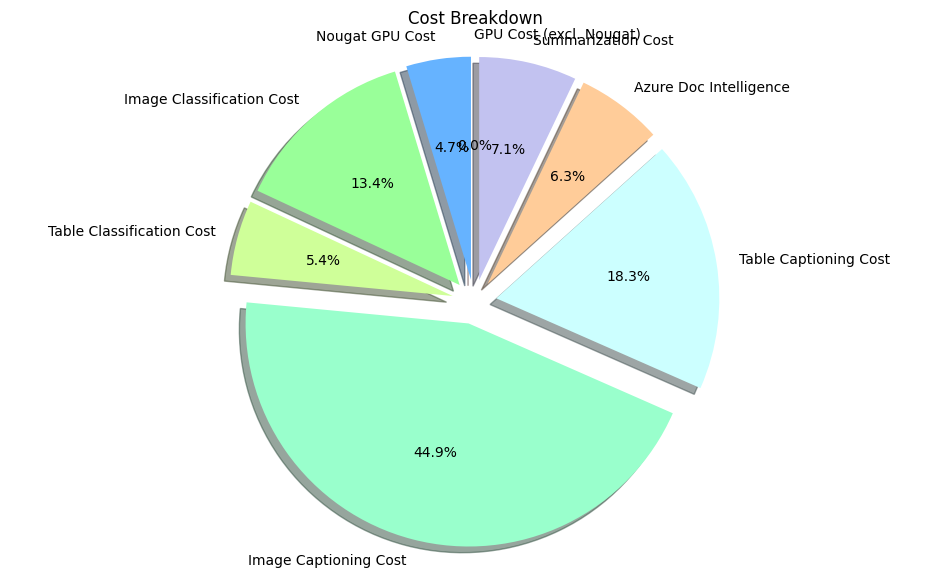

<Figure size 1400x800 with 0 Axes>

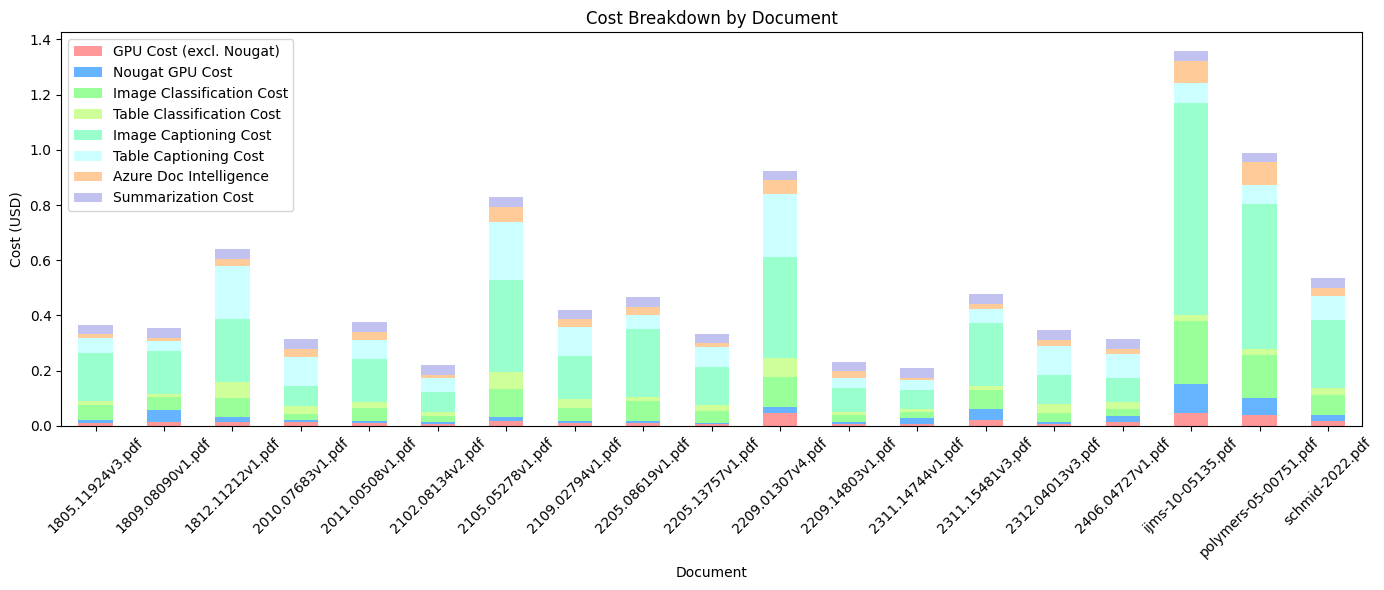

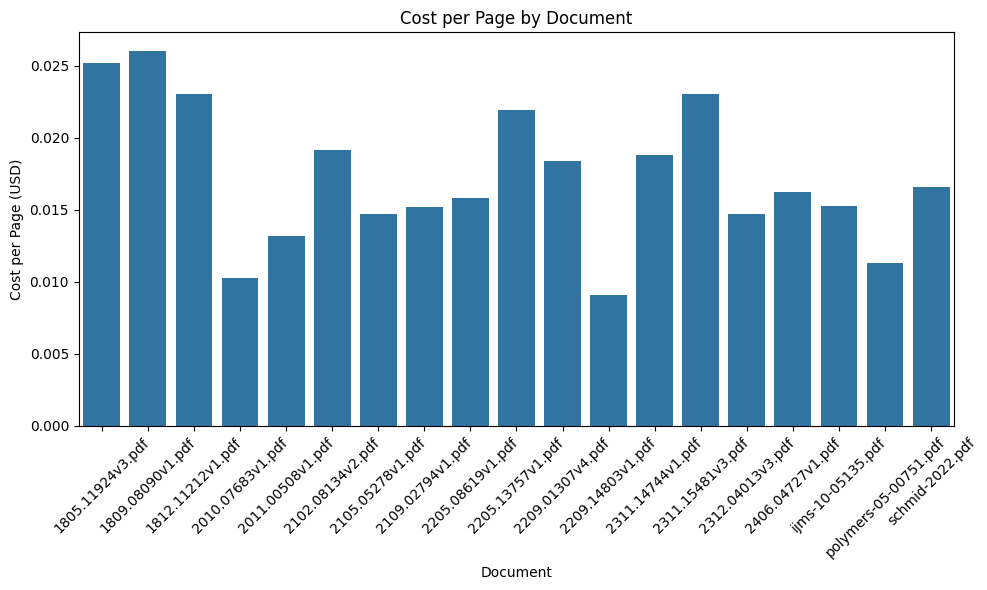

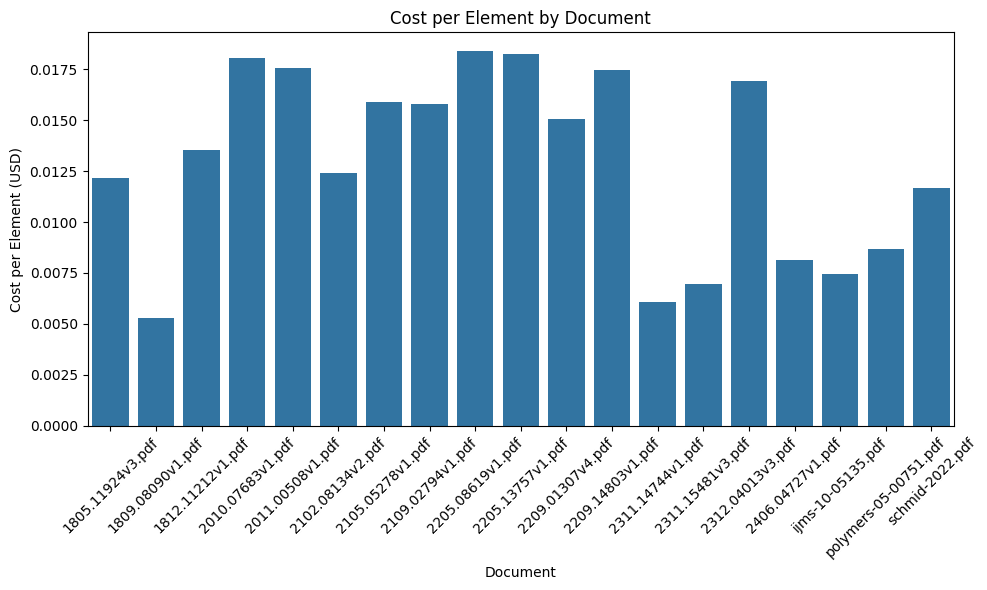

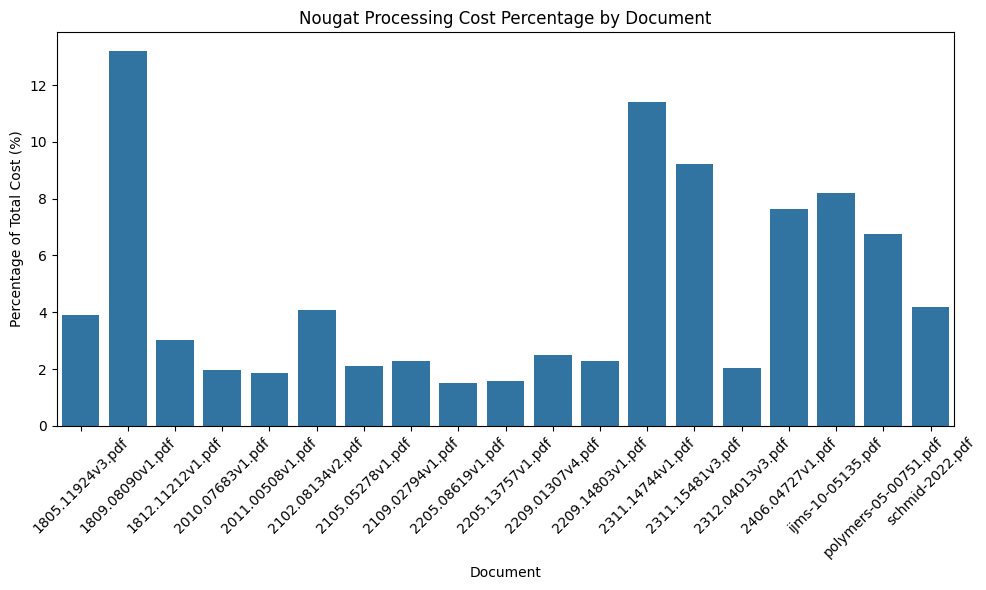


Cost Optimization Recommendations:
1. The average cost per page is $0.0158
2. Nougat image processing accounts for 139.7% of the total processing time
3. The most cost-effective document was: 2209.14803v1.pdf at $0.0091 per page
4. The least cost-effective document was: 1809.08090v1.pdf at $0.0260 per page

Projected Costs for Larger Datasets:
   Number of Documents  Projected Processing Time (hours)  \
0                   10                           0.172546   
1                   50                           0.862731   
2                  100                           1.725463   
3                  500                           8.627313   
4                 1000                          17.254626   

   Projected Cost (USD)  
0              4.876534  
1             24.382669  
2             48.765339  
3            243.826694  
4            487.653389  


In [ ]:
def evaluate_pipeline_efficiency_detail(json_path, gpu_cost_per_hour=0.96, 
                                classification_cost_per_image=0.005,
                                classification_cost_per_table=0.005,
                                captioning_cost_per_image=0.005,
                                captioning_cost_per_table=0.005,
                                azure_doc_intell_cost_per_page=0.001,
                                summarization_cost_per_document=0.05):
    """
    Evaluate pipeline efficiency and costs based on processing data
    
    Parameters:
    -----------
    json_path: str or Path
        Path to the combined_report.json file
    gpu_cost_per_hour: float
        Cost per hour for GPU usage in USD
    classification_cost_per_image: float
        Cost for classifying each image in USD
    classification_cost_per_table: float
        Cost for classifying each table in USD
    captioning_cost_per_image: float
        Cost for captioning each image in USD
    captioning_cost_per_table: float
        Cost for captioning each table in USD
    azure_doc_intell_cost_per_page: float
        Azure Document Intelligence cost per page in USD
    summarization_cost_per_document: float
        Cost for summarization per document in USD
    """
    # Load processing data
    with open(json_path) as f:
        report_data = json.load(f)
    
    # Extract the documents array for document-level analysis
    documents_df = pd.DataFrame(report_data["documents"])
    
    # Use existing summary data from the JSON where available
    total_documents = report_data.get("total_documents", len(documents_df))
    total_pages = report_data.get("total_pages", documents_df['pages'].sum())
    total_images = report_data.get("total_images", documents_df['images'].sum())
    total_tables = report_data.get("total_tables", documents_df['tables'].sum())
    total_nougat_images = report_data.get("total_nougat_images", documents_df['nougat_images'].sum())
    total_time_seconds = report_data.get("total_time_seconds", documents_df['processing_time_seconds'].sum())
    
    # Print basic processing statistics
    print(f"Total documents processed: {total_documents}")
    print(f"Total pages processed: {total_pages}")
    print(f"Total images extracted: {total_images}")
    print(f"Total tables extracted: {total_tables}")
    print(f"Total nougat images processed: {total_nougat_images}")
    print(f"Total processing time: {total_time_seconds:.2f} seconds")
    
    # Calculate averages or use pre-computed values
    avg_pages_per_document = report_data.get("avg_pages_per_document", total_pages / total_documents)
    avg_images_per_document = report_data.get("avg_images_per_document", total_images / total_documents)
    avg_tables_per_document = report_data.get("avg_tables_per_document", total_tables / total_documents)
    avg_processing_time_per_document = report_data.get("avg_processing_time_per_document", 
                                                      total_time_seconds / total_documents)
    avg_processing_time_per_page = report_data.get("avg_processing_time_per_page", 
                                                  total_time_seconds / total_pages)
    
    print(f"\nAverage pages per document: {avg_pages_per_document:.2f}")
    print(f"Average images per document: {avg_images_per_document:.2f}")
    print(f"Average tables per document: {avg_tables_per_document:.2f}")
    print(f"Average processing time per document: {avg_processing_time_per_document:.2f} seconds")
    print(f"Average processing time per page: {avg_processing_time_per_page:.2f} seconds")
    
    # Cost Analysis
    # Calculate processing time in hours
    total_processing_time_hours = total_time_seconds / 3600
    
    # Calculate GPU cost
    total_gpu_cost = total_processing_time_hours * gpu_cost_per_hour
    
    # Calculate classification and captioning costs for images and tables
    total_image_classification_cost = total_images * classification_cost_per_image
    total_table_classification_cost = total_tables * classification_cost_per_table
    total_image_captioning_cost = total_images * captioning_cost_per_image
    total_table_captioning_cost = total_tables * captioning_cost_per_table
    
    # Total postprocessing cost (for compatibility with existing code)
    total_postprocessing_cost = (total_image_classification_cost + total_table_classification_cost + 
                                total_image_captioning_cost + total_table_captioning_cost)
    
    # Calculate Azure Document Intelligence cost
    total_azure_doc_cost = total_pages * azure_doc_intell_cost_per_page
    
    # Calculate summarization cost
    total_summarization_cost = total_documents * summarization_cost_per_document
    
    # Calculate total cost
    total_cost = total_gpu_cost + total_postprocessing_cost + total_azure_doc_cost + total_summarization_cost
    
    # Calculate average costs
    avg_cost_per_document = total_cost / total_documents
    avg_cost_per_page = total_cost / total_pages
    
    # Estimated nougat image processing time
    if 'processing_time_per_nougat_image' not in documents_df.columns:
        # Calculate if not present
        documents_df['processing_time_per_nougat_image'] = documents_df.apply(
            lambda row: row['processing_time_seconds'] / row['nougat_images'] if row['nougat_images'] > 0 else 0, 
            axis=1
        )
    
    avg_time_per_nougat_image = documents_df['processing_time_per_nougat_image'].mean()
    estimated_nougat_processing_time = total_nougat_images * avg_time_per_nougat_image
    nougat_processing_percentage = (estimated_nougat_processing_time / total_time_seconds) * 100 if total_time_seconds > 0 else 0
    estimated_nougat_gpu_cost = (estimated_nougat_processing_time / 3600) * gpu_cost_per_hour
    
    # Calculate costs per document
    documents_df['processing_time_hours'] = documents_df['processing_time_seconds'] / 3600
    documents_df['gpu_cost'] = documents_df['processing_time_hours'] * gpu_cost_per_hour
    documents_df['image_classification_cost'] = documents_df['images'] * classification_cost_per_image
    documents_df['table_classification_cost'] = documents_df['tables'] * classification_cost_per_table
    documents_df['image_captioning_cost'] = documents_df['images'] * captioning_cost_per_image
    documents_df['table_captioning_cost'] = documents_df['tables'] * captioning_cost_per_table
    documents_df['postprocessing_cost'] = (documents_df['image_classification_cost'] + 
                                         documents_df['table_classification_cost'] + 
                                         documents_df['image_captioning_cost'] + 
                                         documents_df['table_captioning_cost'])
    documents_df['azure_doc_cost'] = documents_df['pages'] * azure_doc_intell_cost_per_page
    documents_df['summarization_cost'] = summarization_cost_per_document
    documents_df['total_cost'] = (documents_df['gpu_cost'] + documents_df['postprocessing_cost'] + 
                                documents_df['azure_doc_cost'] + documents_df['summarization_cost'])
    documents_df['cost_per_page'] = documents_df['total_cost'] / documents_df['pages']
    
    # Estimated nougat processing cost per document
    documents_df['estimated_nougat_processing_time'] = documents_df['nougat_images'] * avg_time_per_nougat_image
    documents_df['estimated_nougat_processing_percentage'] = (documents_df['estimated_nougat_processing_time'] / documents_df['processing_time_seconds']) * 100
    documents_df['estimated_nougat_gpu_cost'] = (documents_df['estimated_nougat_processing_time'] / 3600) * gpu_cost_per_hour
    
    # Display cost metrics
    cost_metrics = {
        'Total GPU Cost (USD)': total_gpu_cost,
        'Total Image Classification Cost (USD)': total_image_classification_cost,
        'Total Table Classification Cost (USD)': total_table_classification_cost,
        'Total Image Captioning Cost (USD)': total_image_captioning_cost,
        'Total Table Captioning Cost (USD)': total_table_captioning_cost,
        'Total Azure Document Intelligence Cost (USD)': total_azure_doc_cost,
        'Total Summarization Cost (USD)': total_summarization_cost,
        'Total Cost (USD)': total_cost,
        'Average Cost per Document (USD)': avg_cost_per_document,
        'Average Cost per Page (USD)': avg_cost_per_page,
        'Estimated Nougat Processing Percentage (%)': nougat_processing_percentage,
        'Estimated Nougat GPU Cost (USD)': estimated_nougat_gpu_cost
    }
    
    print("\nCost Analysis:")
    for metric, value in cost_metrics.items():
        print(f"{metric}: ${value:.4f}")
    
    # Plot cost breakdown
    plt.figure(figsize=(12, 7))
    labels = ['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 
              'Image Classification Cost', 'Table Classification Cost',
              'Image Captioning Cost', 'Table Captioning Cost', 
              'Azure Doc Intelligence', 'Summarization Cost']
    sizes = [
        total_gpu_cost - estimated_nougat_gpu_cost, 
        estimated_nougat_gpu_cost,
        total_image_classification_cost,
        total_table_classification_cost,
        total_image_captioning_cost,
        total_table_captioning_cost,
        total_azure_doc_cost,
        total_summarization_cost
    ]
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#cfff99', '#99ffcc', '#ccffff', '#ffcc99', '#c2c2f0']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
    
    sizes = np.maximum(0, sizes)
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Cost Breakdown')
    plt.show()
    
    # Plot cost by document
    plt.figure(figsize=(14, 8))
    documents_df[['gpu_cost', 'estimated_nougat_gpu_cost', 
                  'image_classification_cost', 'table_classification_cost',
                  'image_captioning_cost', 'table_captioning_cost', 
                  'azure_doc_cost', 'summarization_cost']].plot(
        kind='bar', stacked=True,
        color=['#ff9999', '#66b3ff', '#99ff99', '#cfff99', '#99ffcc', '#ccffff', '#ffcc99', '#c2c2f0'],
        figsize=(14, 6)
    )
    plt.title('Cost Breakdown by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost (USD)')
    plt.xticks(range(len(documents_df)), documents_df['document_name'], rotation=45)
    plt.legend(['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 
                'Image Classification Cost', 'Table Classification Cost',
                'Image Captioning Cost', 'Table Captioning Cost', 
                'Azure Doc Intelligence', 'Summarization Cost'])
    plt.tight_layout()
    plt.show()
    
    # Plot cost per page by document
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='cost_per_page', data=documents_df)
    plt.title('Cost per Page by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost per Page (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate cost efficiency metrics
    documents_df['cost_per_element'] = documents_df['total_cost'] / (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images'])
    documents_df['nougat_cost_percentage'] = (documents_df['estimated_nougat_gpu_cost'] / documents_df['total_cost']) * 100
    
    # Display cost efficiency metrics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='cost_per_element', data=documents_df)
    plt.title('Cost per Element by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost per Element (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='nougat_cost_percentage', data=documents_df)
    plt.title('Nougat Processing Cost Percentage by Document')
    plt.xlabel('Document')
    plt.ylabel('Percentage of Total Cost (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Find optimal batch size and processing strategies
    print("\nCost Optimization Recommendations:")
    print("1. The average cost per page is ${:.4f}".format(avg_cost_per_page))
    print("2. Nougat image processing accounts for {:.1f}% of the total processing time".format(nougat_processing_percentage))
    
    if len(documents_df) > 0:  # Safety check to prevent IndexError
        print("3. The most cost-effective document was: {} at ${:.4f} per page".format(
            documents_df.loc[documents_df['cost_per_page'].idxmin(), 'document_name'],
            documents_df['cost_per_page'].min()
        ))
        print("4. The least cost-effective document was: {} at ${:.4f} per page".format(
            documents_df.loc[documents_df['cost_per_page'].idxmax(), 'document_name'],
            documents_df['cost_per_page'].max()
        ))
    
    # Calculate the projected costs for processing larger datasets
    projected_costs = pd.DataFrame({
        'Number of Documents': [10, 50, 100, 500, 1000],
        'Projected Processing Time (hours)': [total_processing_time_hours * n / total_documents for n in [10, 50, 100, 500, 1000]],
        'Projected Cost (USD)': [total_cost * n / total_documents for n in [10, 50, 100, 500, 1000]]
    })
    
    print("\nProjected Costs for Larger Datasets:")
    print(projected_costs)
    
    # Return the data for further analysis if needed
    return {
        'documents_df': documents_df,
        'cost_metrics': cost_metrics,
        'projected_costs': projected_costs
    }

# Example usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set the path to your combined_report.json file
json_path = Path('combined_report.json')

# Set the cost parameters
gpu_cost_per_hour = 0.96  # USD/hour
azure_doc_intell_cost_per_page = 0.001  # USD per page

tasks = {
    "classification": {"model_name": "GPT-4o", "input": 2_000, "output": 21},
    "summarization": {"model_name": "GPT-4o", "input": 10_000, "output": 1000},
    "captioning": {"model_name": "GPT-4o", "input": 5_000, "output": 500},
}

classification_cost_per_image = calculate_llm_cost(
    tasks["classification"]["model_name"],
    tasks["classification"]["input"],
    tasks["classification"]["output"]
)  # USD per image
classification_cost_per_table = calculate_llm_cost(
    tasks["classification"]["model_name"],
    tasks["classification"]["input"],
    tasks["classification"]["output"]
)  # USD per table
captioning_cost_per_image = calculate_llm_cost(
    tasks["captioning"]["model_name"],
    tasks["captioning"]["input"],
    tasks["captioning"]["output"]
)  # USD per image
captioning_cost_per_table = calculate_llm_cost(
    tasks["captioning"]["model_name"],
    tasks["captioning"]["input"],
    tasks["captioning"]["output"]
)  # USD per table

summarization_cost_per_document = calculate_llm_cost(
    tasks["summarization"]["model_name"],
    tasks["summarization"]["input"],
    tasks["summarization"]["output"]
)  # USD per document


# Run the evaluation
results = evaluate_pipeline_efficiency_detail(
    json_path,
    gpu_cost_per_hour,
    classification_cost_per_image,
    classification_cost_per_table,
    captioning_cost_per_image,
    captioning_cost_per_table,
    azure_doc_intell_cost_per_page,
    summarization_cost_per_document
)

In [18]:
def evaluate_pipeline_efficiency(json_path, gpu_cost_per_hour=0.96, 
                                classification_cost_per_image=0.005,
                                classification_cost_per_table=0.005,
                                captioning_cost_per_image=0.005,
                                captioning_cost_per_table=0.005,
                                azure_doc_intell_cost_per_page=0.001,
                                summarization_cost_per_document=0.05):
    """
    Evaluate pipeline efficiency and costs based on processing data
    
    Parameters:
    -----------
    json_path: str or Path
        Path to the combined_report.json file
    gpu_cost_per_hour: float
        Cost per hour for GPU usage in USD
    classification_cost_per_image: float
        Cost for classifying each image in USD
    classification_cost_per_table: float
        Cost for classifying each table in USD
    captioning_cost_per_image: float
        Cost for captioning each image in USD
    captioning_cost_per_table: float
        Cost for captioning each table in USD
    azure_doc_intell_cost_per_page: float
        Azure Document Intelligence cost per page in USD
    summarization_cost_per_document: float
        Cost for summarization per document in USD
    """
    # Load processing data
    with open(json_path) as f:
        report_data = json.load(f)
    
    # Extract the documents array for document-level analysis
    documents_df = pd.DataFrame(report_data["documents"])
    
    # Use existing summary data from the JSON where available
    total_documents = report_data.get("total_documents", len(documents_df))
    total_pages = report_data.get("total_pages", documents_df['pages'].sum())
    total_images = report_data.get("total_images", documents_df['images'].sum())
    total_tables = report_data.get("total_tables", documents_df['tables'].sum())
    total_nougat_images = report_data.get("total_nougat_images", documents_df['nougat_images'].sum())
    total_time_seconds = report_data.get("total_time_seconds", documents_df['processing_time_seconds'].sum())
    
    # Print basic processing statistics
    print(f"Total documents processed: {total_documents}")
    print(f"Total pages processed: {total_pages}")
    print(f"Total images extracted: {total_images}")
    print(f"Total tables extracted: {total_tables}")
    print(f"Total nougat images processed: {total_nougat_images}")
    print(f"Total processing time: {total_time_seconds:.2f} seconds")
    
    # Calculate averages or use pre-computed values
    avg_pages_per_document = report_data.get("avg_pages_per_document", total_pages / total_documents)
    avg_images_per_document = report_data.get("avg_images_per_document", total_images / total_documents)
    avg_tables_per_document = report_data.get("avg_tables_per_document", total_tables / total_documents)
    avg_processing_time_per_document = report_data.get("avg_processing_time_per_document", 
                                                      total_time_seconds / total_documents)
    avg_processing_time_per_page = report_data.get("avg_processing_time_per_page", 
                                                  total_time_seconds / total_pages)
    
    print(f"\nAverage pages per document: {avg_pages_per_document:.2f}")
    print(f"Average images per document: {avg_images_per_document:.2f}")
    print(f"Average tables per document: {avg_tables_per_document:.2f}")
    print(f"Average processing time per document: {avg_processing_time_per_document:.2f} seconds")
    print(f"Average processing time per page: {avg_processing_time_per_page:.2f} seconds")
    
    # Cost Analysis
    # Calculate processing time in hours
    total_processing_time_hours = total_time_seconds / 3600
    
    # Calculate GPU cost
    total_gpu_cost = total_processing_time_hours * gpu_cost_per_hour
    
    # Calculate classification and captioning costs for images and tables
    total_image_classification_cost = total_images * classification_cost_per_image
    total_table_classification_cost = total_tables * classification_cost_per_table
    total_image_captioning_cost = total_images * captioning_cost_per_image
    total_table_captioning_cost = total_tables * captioning_cost_per_table
    
    # Total postprocessing cost (for compatibility with existing code)
    total_postprocessing_cost = (total_image_classification_cost + total_table_classification_cost + 
                                total_image_captioning_cost + total_table_captioning_cost)
    
    # Calculate Azure Document Intelligence cost
    total_azure_doc_cost = total_pages * azure_doc_intell_cost_per_page
    
    # Calculate summarization cost
    total_summarization_cost = total_documents * summarization_cost_per_document
    
    # Calculate total cost
    total_cost = total_gpu_cost + total_postprocessing_cost + total_azure_doc_cost + total_summarization_cost
    
    # Calculate average costs
    avg_cost_per_document = total_cost / total_documents
    avg_cost_per_page = total_cost / total_pages
    
    # Estimated nougat image processing time
    if 'processing_time_per_nougat_image' not in documents_df.columns:
        # Calculate if not present
        documents_df['processing_time_per_nougat_image'] = documents_df.apply(
            lambda row: row['processing_time_seconds'] / row['nougat_images'] if row['nougat_images'] > 0 else 0, 
            axis=1
        )
    
    avg_time_per_nougat_image = documents_df['processing_time_per_nougat_image'].mean()
    estimated_nougat_processing_time = total_nougat_images * avg_time_per_nougat_image
    nougat_processing_percentage = (estimated_nougat_processing_time / total_time_seconds) * 100 if total_time_seconds > 0 else 0
    estimated_nougat_gpu_cost = (estimated_nougat_processing_time / 3600) * gpu_cost_per_hour
    
    # Calculate costs per document
    documents_df['processing_time_hours'] = documents_df['processing_time_seconds'] / 3600
    documents_df['gpu_cost'] = documents_df['processing_time_hours'] * gpu_cost_per_hour
    documents_df['image_classification_cost'] = documents_df['images'] * classification_cost_per_image
    documents_df['table_classification_cost'] = documents_df['tables'] * classification_cost_per_table
    documents_df['image_captioning_cost'] = documents_df['images'] * captioning_cost_per_image
    documents_df['table_captioning_cost'] = documents_df['tables'] * captioning_cost_per_table
    documents_df['postprocessing_cost'] = (documents_df['image_classification_cost'] + 
                                         documents_df['table_classification_cost'] + 
                                         documents_df['image_captioning_cost'] + 
                                         documents_df['table_captioning_cost'])
    documents_df['azure_doc_cost'] = documents_df['pages'] * azure_doc_intell_cost_per_page
    documents_df['summarization_cost'] = summarization_cost_per_document
    documents_df['total_cost'] = (documents_df['gpu_cost'] + documents_df['postprocessing_cost'] + 
                                documents_df['azure_doc_cost'] + documents_df['summarization_cost'])
    documents_df['cost_per_page'] = documents_df['total_cost'] / documents_df['pages']
    
    # Estimated nougat processing cost per document
    documents_df['estimated_nougat_processing_time'] = documents_df['nougat_images'] * avg_time_per_nougat_image
    documents_df['estimated_nougat_processing_percentage'] = (documents_df['estimated_nougat_processing_time'] / documents_df['processing_time_seconds']) * 100
    documents_df['estimated_nougat_gpu_cost'] = (documents_df['estimated_nougat_processing_time'] / 3600) * gpu_cost_per_hour
    
    # Display cost metrics
    cost_metrics = {
        'Total GPU Cost (USD)': total_gpu_cost,
        'Total Image Classification Cost (USD)': total_image_classification_cost,
        'Total Table Classification Cost (USD)': total_table_classification_cost,
        'Total Image Captioning Cost (USD)': total_image_captioning_cost,
        'Total Table Captioning Cost (USD)': total_table_captioning_cost,
        'Total Azure Document Intelligence Cost (USD)': total_azure_doc_cost,
        'Total Summarization Cost (USD)': total_summarization_cost,
        'Total Cost (USD)': total_cost,
        'Average Cost per Document (USD)': avg_cost_per_document,
        'Average Cost per Page (USD)': avg_cost_per_page,
        'Estimated Nougat Processing Percentage (%)': nougat_processing_percentage,
        'Estimated Nougat GPU Cost (USD)': estimated_nougat_gpu_cost,
        'document_count': len(documents_df),
        'total_pages': total_pages,
        'total_images': total_images,
        'total_tables': total_tables,
        'total_nougat_images': total_nougat_images,
        'total_time_seconds': total_time_seconds,
        'avg_pages_per_document': avg_pages_per_document,
        'avg_images_per_document': avg_images_per_document,
        'avg_tables_per_document': avg_tables_per_document,
        'avg_processing_time_per_document': avg_processing_time_per_document,
        'avg_processing_time_per_page': avg_processing_time_per_page
    }
    
    print("\nCost Analysis:")
    for metric, value in cost_metrics.items():
        print(f"{metric}: ${value:.4f}")


    
    # Return the data for further analysis if needed
    return {
        'documents_df': documents_df,
        'cost_metrics': cost_metrics
    }

# Example usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set the path to your combined_report.json file
json_path = Path('combined_report.json')

# Set the cost parameters
gpu_cost_per_hour = 0.96  # USD/hour
azure_doc_intell_cost_per_page = 0.001  # USD per page

tasks = {
    "classification": {"model_name": "GPT-4o", "input": 2_000, "output": 21},
    "summarization": {"model_name": "GPT-4o", "input": 10_000, "output": 1000},
    "captioning": {"model_name": "GPT-4o", "input": 5_000, "output": 500},
}

classification_cost_per_image = calculate_llm_cost(
    tasks["classification"]["model_name"],
    tasks["classification"]["input"],
    tasks["classification"]["output"]
)  # USD per image
classification_cost_per_table = calculate_llm_cost(
    tasks["classification"]["model_name"],
    tasks["classification"]["input"],
    tasks["classification"]["output"]
)  # USD per table
captioning_cost_per_image = calculate_llm_cost(
    tasks["captioning"]["model_name"],
    tasks["captioning"]["input"],
    tasks["captioning"]["output"]
)  # USD per image
captioning_cost_per_table = calculate_llm_cost(
    tasks["captioning"]["model_name"],
    tasks["captioning"]["input"],
    tasks["captioning"]["output"]
)  # USD per table

summarization_cost_per_document = calculate_llm_cost(
    tasks["summarization"]["model_name"],
    tasks["summarization"]["input"],
    tasks["summarization"]["output"]
)  # USD per document


# Run the evaluation
results = evaluate_pipeline_efficiency(
    json_path,
    gpu_cost_per_hour,
    classification_cost_per_image,
    classification_cost_per_table,
    captioning_cost_per_image,
    captioning_cost_per_table,
    azure_doc_intell_cost_per_page,
    summarization_cost_per_document
)

Total documents processed: 19
Total pages processed: 587
Total images extracted: 241
Total tables extracted: 98
Total nougat images processed: 512
Total processing time: 1180.22 seconds

Average pages per document: 30.89
Average images per document: 12.68
Average tables per document: 5.16
Average processing time per document: 62.12 seconds
Average processing time per page: 2.01 seconds

Cost Analysis:
Total GPU Cost (USD): $0.3147
Total Image Classification Cost (USD): $1.2556
Total Table Classification Cost (USD): $0.5106
Total Image Captioning Cost (USD): $4.2175
Total Table Captioning Cost (USD): $1.7150
Total Azure Document Intelligence Cost (USD): $0.5870
Total Summarization Cost (USD): $0.6650
Total Cost (USD): $9.2654
Average Cost per Document (USD): $0.4877
Average Cost per Page (USD): $0.0158
Estimated Nougat Processing Percentage (%): $139.7223
Estimated Nougat GPU Cost (USD): $0.4397
document_count: $19.0000
total_pages: $587.0000
total_images: $241.0000
total_tables: $98.00

In [19]:
results['cost_metrics']

{'Total GPU Cost (USD)': 0.3147243849436442,
 'Total Image Classification Cost (USD)': 1.2556100000000001,
 'Total Table Classification Cost (USD)': 0.51058,
 'Total Image Captioning Cost (USD)': 4.2175,
 'Total Table Captioning Cost (USD)': 1.715,
 'Total Azure Document Intelligence Cost (USD)': 0.587,
 'Total Summarization Cost (USD)': 0.665,
 'Total Cost (USD)': 9.265414384943643,
 'Average Cost per Document (USD)': 0.48765338868124436,
 'Average Cost per Page (USD)': 0.015784351592748967,
 'Estimated Nougat Processing Percentage (%)': 139.72230336643932,
 'Estimated Nougat GPU Cost (USD)': 0.4397401598991188,
 'document_count': 19,
 'total_pages': 587,
 'total_images': 241,
 'total_tables': 98,
 'total_nougat_images': 512,
 'total_time_seconds': 1180.2164435386658,
 'avg_pages_per_document': 30.894736842105264,
 'avg_images_per_document': 12.68421052631579,
 'avg_tables_per_document': 5.157894736842105,
 'avg_processing_time_per_document': 62.11665492308767,
 'avg_processing_time_p


Evaluating Scenario 1: GPT-4o Standard
  Classification cost per image/table: $0.005210
  Captioning cost per image/table: $0.017500
  Summarization cost per document: $0.035000
Total documents processed: 19
Total pages processed: 587
Total images extracted: 241
Total tables extracted: 98
Total nougat images processed: 512
Total processing time: 1180.22 seconds

Average pages per document: 30.89
Average images per document: 12.68
Average tables per document: 5.16
Average processing time per document: 62.12 seconds
Average processing time per page: 2.01 seconds

Cost Analysis:
Total GPU Cost (USD): $0.3147
Total Image Classification Cost (USD): $1.2556
Total Table Classification Cost (USD): $0.5106
Total Image Captioning Cost (USD): $4.2175
Total Table Captioning Cost (USD): $1.7150
Total Azure Document Intelligence Cost (USD): $0.5870
Total Summarization Cost (USD): $0.6650
Total Cost (USD): $9.2654
Average Cost per Document (USD): $0.4877
Average Cost per Page (USD): $0.0158
Estimate

/tmp/ipykernel_317585/3215463159.py:168: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_costs = pd.concat([all_costs, scenario_costs])
/tmp/ipykernel_317585/3215463159.py:172: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avg_costs_per_doc = pd.concat([avg_costs_per_doc, avg_scenario_costs])


<Figure size 1500x1000 with 0 Axes>

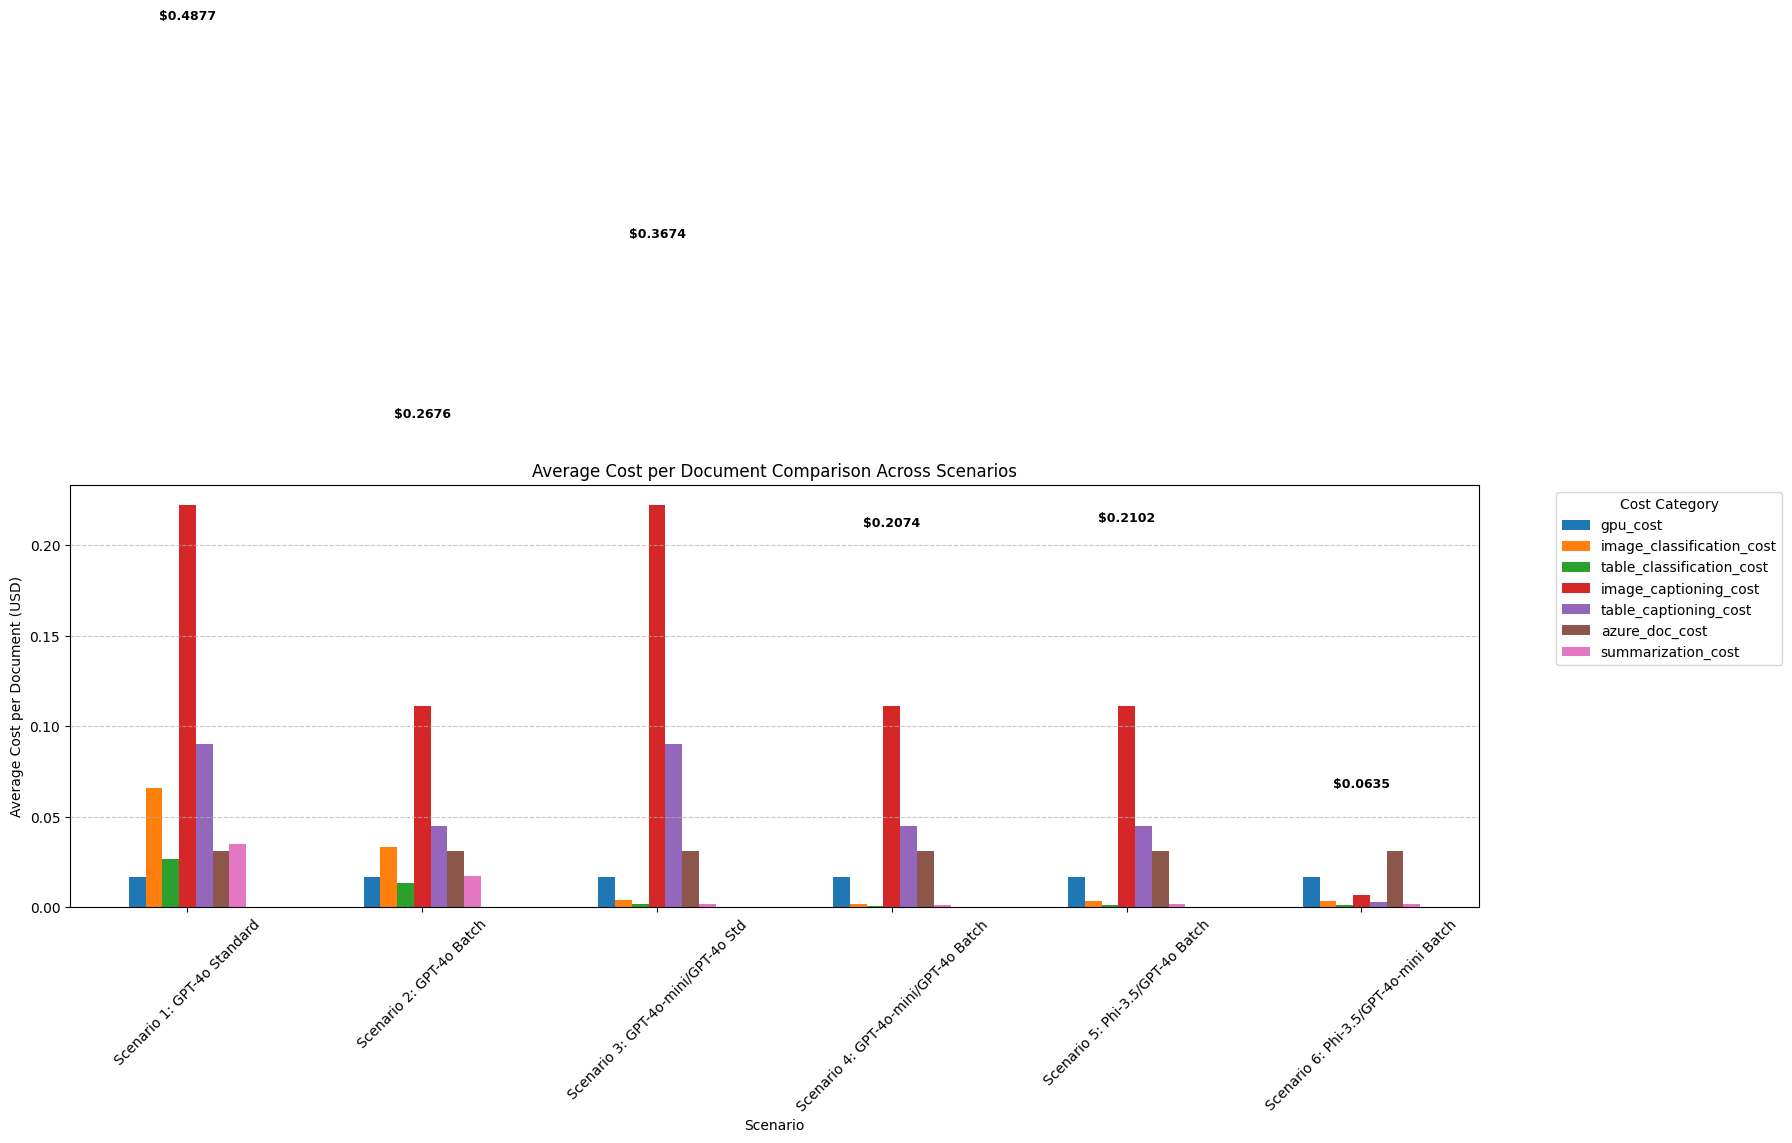

<Figure size 1500x800 with 0 Axes>

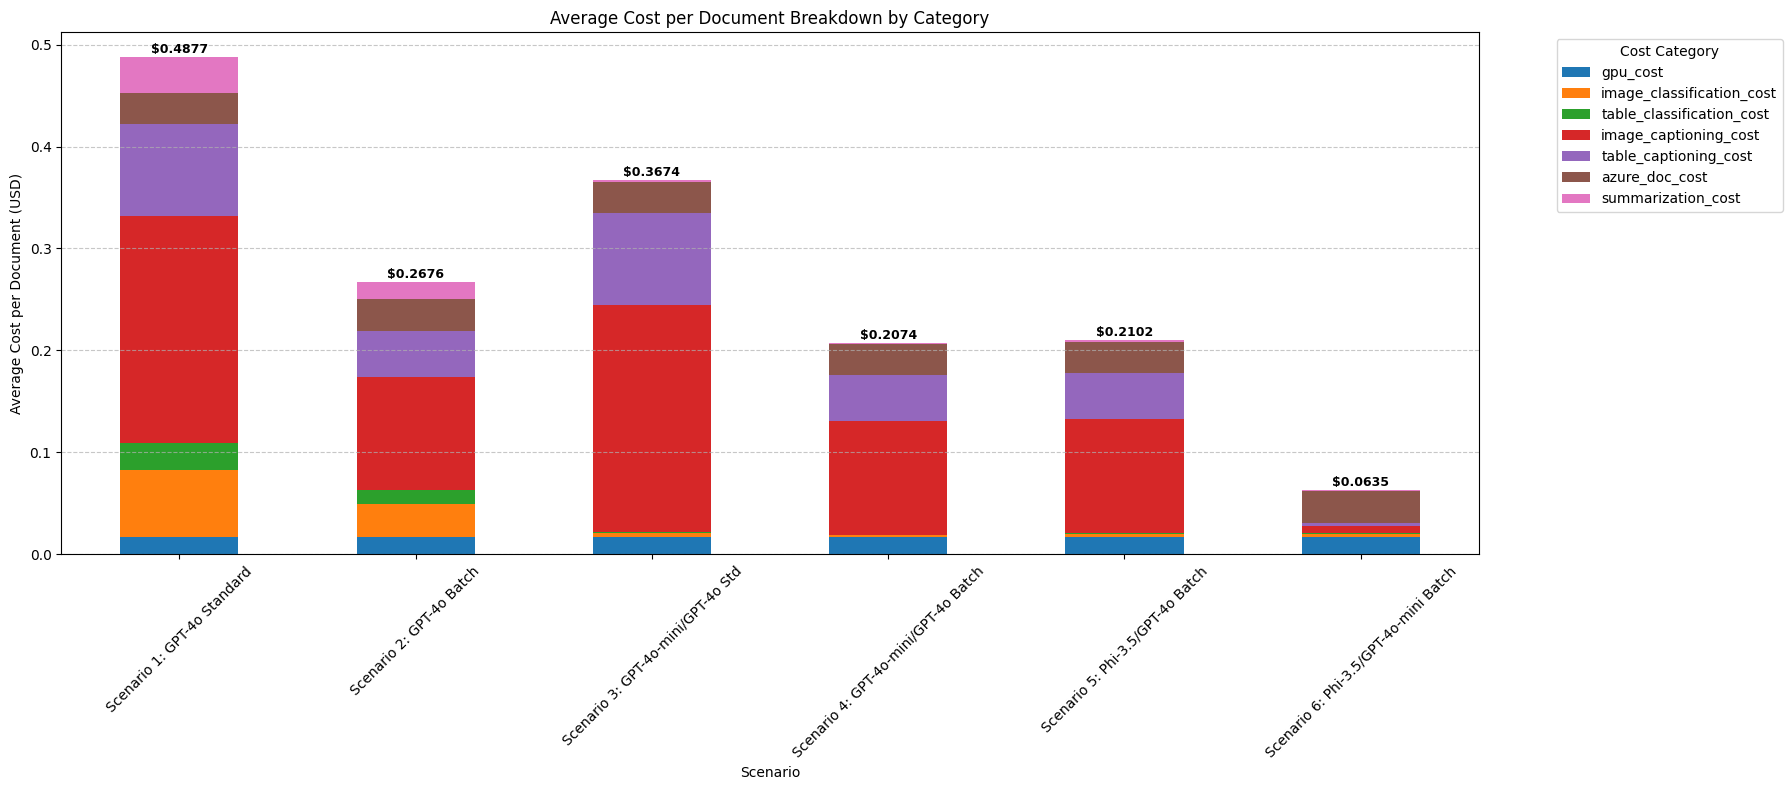

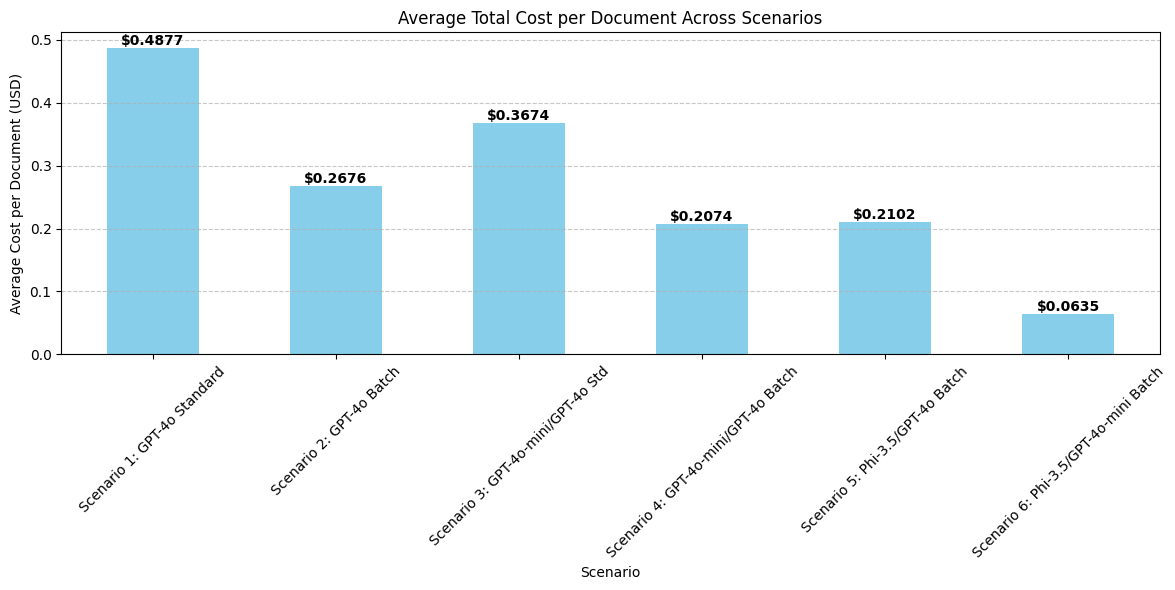

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

def calculate_llm_cost(model_name, input_tokens, output_tokens, api_type="Standard"):
    """Calculate LLM cost considering different API types (Standard vs Batch)"""
    model_costs = {
        "GPT-4": {"input": 25.00 / 1_000_000, "output": 50.00 / 1_000_000},
        "GPT-4o": {"input": 2.50 / 1_000_000, "output": 10.00 / 1_000_000},
        "GPT-4o-mini": {"input": 0.15 / 1_000_000, "output": 0.60 / 1_000_000},
        "Phi-3.5-mini-instruct": {"input": 0.00013 / 1_000, "output": 0.00052 / 1_000},
        "Phi-3.5-MoE-instruct": {"input": 0.00016 / 1_000, "output": 0.00064 / 1_000},
        "Phi-3.5-vision-instruct": {"input": 0.00013 / 1_000, "output": 0.00052 / 1_000},
        "DeepSeek": {"input": 0.27 / 1_000_000, "output": 1.10 / 1_000_000}
    }

    if model_name not in model_costs:
        raise ValueError(f"Invalid model name: {model_name}")

    costs = model_costs[model_name]
    input_cost = costs["input"] * input_tokens
    output_cost = costs["output"] * output_tokens
    total_cost = input_cost + output_cost
    
    # Apply discount for Batch API
    if api_type == "Batch":
        total_cost *= 0.5
        
    return total_cost

def compare_pipeline_scenarios(json_path, gpu_cost_per_hour=0.96, azure_doc_intell_cost_per_page=0.001):
    """
    Compare different scenarios for pipeline efficiency and costs
    
    Parameters:
    -----------
    json_path: str or Path
        Path to the combined_report.json file
    gpu_cost_per_hour: float
        Cost per hour for GPU usage in USD
    azure_doc_intell_cost_per_page: float
        Azure Document Intelligence cost per page in USD
    """
    # Define the scenarios
    scenarios = {
        "Scenario 1: GPT-4o Standard": {
            "classification": {"model_name": "GPT-4o", "api": "Standard", "input": 2_000, "output": 21},
            "summarization": {"model_name": "GPT-4o", "api": "Standard", "input": 10_000, "output": 1000},
            "captioning": {"model_name": "GPT-4o", "api": "Standard", "input": 5_000, "output": 500},
        },
        "Scenario 2: GPT-4o Batch": {
            "classification": {"model_name": "GPT-4o", "api": "Batch", "input": 2_000, "output": 21},
            "summarization": {"model_name": "GPT-4o", "api": "Batch", "input": 10_000, "output": 1000},
            "captioning": {"model_name": "GPT-4o", "api": "Batch", "input": 5_000, "output": 500},
        },
        "Scenario 3: GPT-4o-mini/GPT-4o Std": {
            "classification": {"model_name": "GPT-4o-mini", "api": "Standard", "input": 2_000, "output": 21},
            "summarization": {"model_name": "GPT-4o-mini", "api": "Standard", "input": 10_000, "output": 1000},
            "captioning": {"model_name": "GPT-4o", "api": "Standard", "input": 5_000, "output": 500},
        },
        "Scenario 4: GPT-4o-mini/GPT-4o Batch": {
            "classification": {"model_name": "GPT-4o-mini", "api": "Batch", "input": 2_000, "output": 21},
            "summarization": {"model_name": "GPT-4o-mini", "api": "Batch", "input": 10_000, "output": 1000},
            "captioning": {"model_name": "GPT-4o", "api": "Batch", "input": 5_000, "output": 500},
        },
        "Scenario 5: Phi-3.5/GPT-4o Batch": {
            "classification": {"model_name": "Phi-3.5-vision-instruct", "api": "Standard", "input": 2_000, "output": 21},
            "summarization": {"model_name": "Phi-3.5-vision-instruct", "api": "Standard", "input": 10_000, "output": 1000},
            "captioning": {"model_name": "GPT-4o", "api": "Batch", "input": 5_000, "output": 500},
        },
        "Scenario 6: Phi-3.5/GPT-4o-mini Batch": {
            "classification": {"model_name": "Phi-3.5-vision-instruct", "api": "Standard", "input": 2_000, "output": 21},
            "summarization": {"model_name": "Phi-3.5-vision-instruct", "api": "Standard", "input": 10_000, "output": 1000},
            "captioning": {"model_name": "GPT-4o-mini", "api": "Batch", "input": 5_000, "output": 500},
        }
    }
    
    # Results storage
    scenario_results = {}
    cost_categories = [
        'gpu_cost', 
        # 'estimated_nougat_gpu_cost', 
        'image_classification_cost', 'table_classification_cost',
        'image_captioning_cost', 'table_captioning_cost', 
        'azure_doc_cost', 'summarization_cost'
    ]
    all_costs = pd.DataFrame(columns=cost_categories)
    avg_costs_per_doc = pd.DataFrame(columns=cost_categories)
    
    # Run each scenario
    for scenario_name, tasks in scenarios.items():
        print(f"\nEvaluating {scenario_name}")
        
        # Calculate costs for each task based on model and API type
        classification_cost_per_image = calculate_llm_cost(
            tasks["classification"]["model_name"],
            tasks["classification"]["input"],
            tasks["classification"]["output"],
            tasks["classification"]["api"]
        )
        
        classification_cost_per_table = calculate_llm_cost(
            tasks["classification"]["model_name"],
            tasks["classification"]["input"],
            tasks["classification"]["output"],
            tasks["classification"]["api"]
        )
        
        captioning_cost_per_image = calculate_llm_cost(
            tasks["captioning"]["model_name"],
            tasks["captioning"]["input"],
            tasks["captioning"]["output"],
            tasks["captioning"]["api"]
        )
        
        captioning_cost_per_table = calculate_llm_cost(
            tasks["captioning"]["model_name"],
            tasks["captioning"]["input"],
            tasks["captioning"]["output"],
            tasks["captioning"]["api"]
        )
        
        summarization_cost_per_document = calculate_llm_cost(
            tasks["summarization"]["model_name"],
            tasks["summarization"]["input"],
            tasks["summarization"]["output"],
            tasks["summarization"]["api"]
        )
        
        # Print costs for each model configuration
        print(f"  Classification cost per image/table: ${classification_cost_per_image:.6f}")
        print(f"  Captioning cost per image/table: ${captioning_cost_per_image:.6f}")
        print(f"  Summarization cost per document: ${summarization_cost_per_document:.6f}")
        
        # Run the evaluation with imported function
        results = evaluate_pipeline_efficiency(
            json_path,
            gpu_cost_per_hour,
            classification_cost_per_image,
            classification_cost_per_table,
            captioning_cost_per_image,
            captioning_cost_per_table,
            azure_doc_intell_cost_per_page,
            summarization_cost_per_document
        )
        
        scenario_results[scenario_name] = results
        
        # Extract cost data and document count for comparison
        cost_metrics = results['cost_metrics']
        document_count = cost_metrics['document_count']  # Assuming this is returned by evaluate_pipeline_efficiency
        
        # Calculate total costs
        scenario_costs = pd.DataFrame({
            # 'gpu_cost': [cost_metrics['Total GPU Cost (USD)'] - cost_metrics['Estimated Nougat GPU Cost (USD)']],
            # 'estimated_nougat_gpu_cost': [cost_metrics['Estimated Nougat GPU Cost (USD)']],
            'gpu_cost': [cost_metrics['Total GPU Cost (USD)']],
            'image_classification_cost': [cost_metrics['Total Image Classification Cost (USD)']],
            'table_classification_cost': [cost_metrics['Total Table Classification Cost (USD)']],
            'image_captioning_cost': [cost_metrics['Total Image Captioning Cost (USD)']],
            'table_captioning_cost': [cost_metrics['Total Table Captioning Cost (USD)']],
            'azure_doc_cost': [cost_metrics['Total Azure Document Intelligence Cost (USD)']],
            'summarization_cost': [cost_metrics['Total Summarization Cost (USD)']]
        })
        scenario_costs.index = [scenario_name]
        all_costs = pd.concat([all_costs, scenario_costs])
        
        # Calculate average costs per document
        avg_scenario_costs = scenario_costs / document_count
        avg_costs_per_doc = pd.concat([avg_costs_per_doc, avg_scenario_costs])
    
    # Create comparison plot for all scenarios (per document averages)
    plt.figure(figsize=(15, 10))
    avg_costs_per_doc.plot(kind='bar', figsize=(15, 7), title='Average Cost per Document Comparison Across Scenarios')
    plt.ylabel('Average Cost per Document (USD)')
    plt.xlabel('Scenario')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Cost Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add average cost annotations
    for i, scenario in enumerate(avg_costs_per_doc.index):
        avg_total = avg_costs_per_doc.loc[scenario].sum()
        plt.text(i, avg_costs_per_doc.loc[scenario].sum() + 0.001, f'${avg_total:.4f}', 
                 ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Calculate and display average cost per document per scenario
    print("\n=== Average Cost per Document Per Scenario ===")
    for scenario in avg_costs_per_doc.index:
        print(f"{scenario}: ${avg_costs_per_doc.loc[scenario].sum():.4f}")
    
    # Calculate percentage savings compared to most expensive scenario
    max_avg_cost = avg_costs_per_doc.sum(axis=1).max()
    print("\n=== Savings per Document Compared to Most Expensive Scenario ===")
    for scenario in avg_costs_per_doc.index:
        scenario_avg_cost = avg_costs_per_doc.loc[scenario].sum()
        savings = max_avg_cost - scenario_avg_cost
        savings_percent = (savings / max_avg_cost) * 100
        print(f"{scenario}: ${savings:.4f} per document ({savings_percent:.2f}%)")
    
    # Create a stacked bar chart for better visualization of average costs
    plt.figure(figsize=(15, 8))
    avg_costs_per_doc.plot(kind='bar', stacked=True, figsize=(15, 8), 
                title='Average Cost per Document Breakdown by Category')
    plt.ylabel('Average Cost per Document (USD)')
    plt.xlabel('Scenario')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Cost Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add value labels to the bars - corrected version
    for i, scenario in enumerate(avg_costs_per_doc.index):
        scenario_sum = avg_costs_per_doc.loc[scenario].sum()
        plt.text(i, scenario_sum + 0.001, f'${scenario_sum:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Create a direct comparison bar chart for average total costs
    plt.figure(figsize=(12, 6))
    avg_total_costs = avg_costs_per_doc.sum(axis=1)
    avg_total_costs.plot(kind='bar', figsize=(12, 6), color='skyblue',
                         title='Average Total Cost per Document Across Scenarios')
    plt.ylabel('Average Cost per Document (USD)')
    plt.xlabel('Scenario')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels to the bars
    for i, value in enumerate(avg_total_costs):
        plt.text(i, value + 0.0001, f'${value:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Return results dictionary and the DataFrames
    return {
        'scenario_results': scenario_results,
        'cost_comparison': all_costs,
        'avg_cost_per_doc': avg_costs_per_doc
    }

# Example usage
result = compare_pipeline_scenarios('combined_report.json')

Total documents processed: 19
Total pages processed: 587
Total images extracted: 241
Total tables extracted: 98
Total nougat images processed: 512
Total processing time: 1180.22 seconds

Average pages per document: 30.89
Average images per document: 12.68
Average tables per document: 5.16
Average processing time per document: 62.12 seconds
Average processing time per page: 2.01 seconds

Cost Analysis:
Total GPU Cost (USD): $0.3147
Total Postprocessing Cost (USD): $6.7800
Total Azure Document Intelligence Cost (USD): $0.5870
Total Summarization Cost (USD): $0.9500
Total Cost (USD): $8.6317
Average Cost per Document (USD): $0.4543
Average Cost per Page (USD): $0.0147
Estimated Nougat Processing Percentage (%): $139.7223
Estimated Nougat GPU Cost (USD): $0.4397


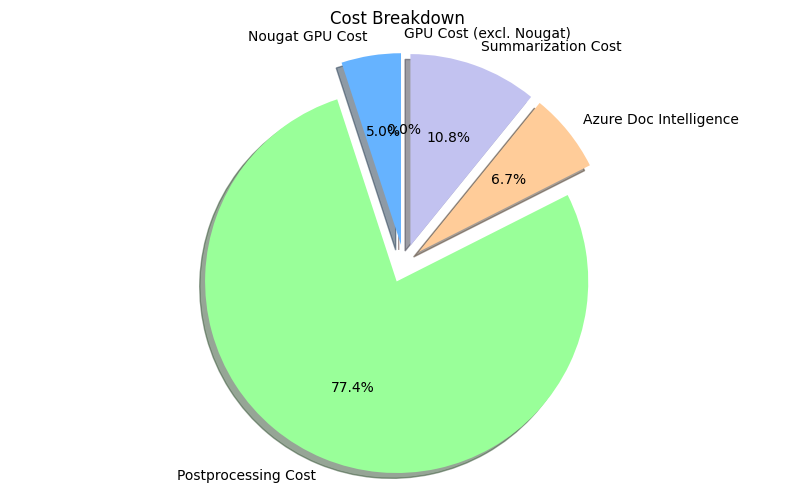

<Figure size 1200x800 with 0 Axes>

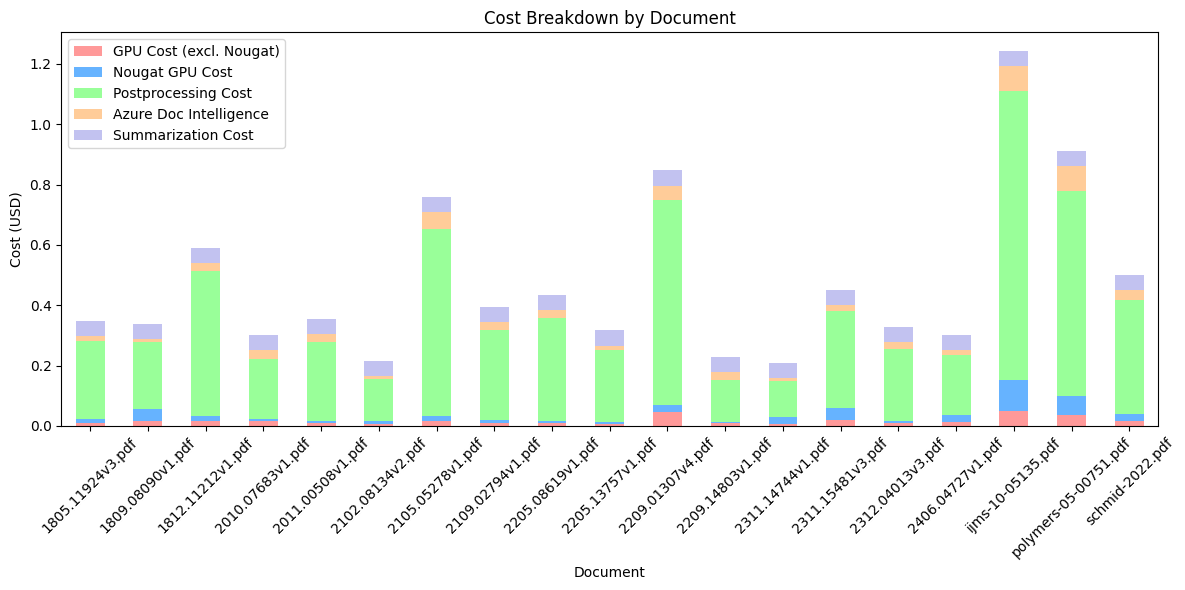

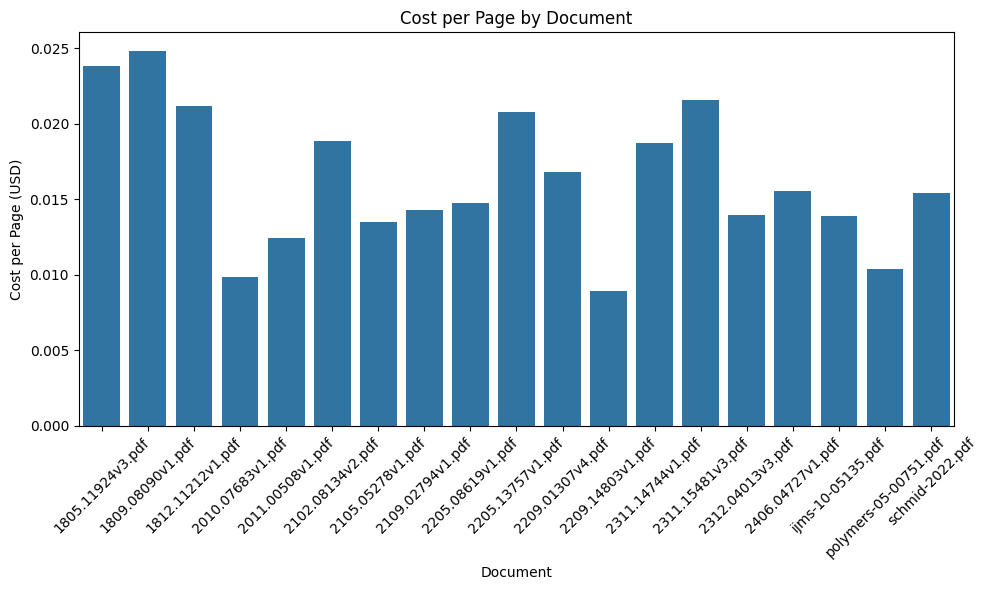

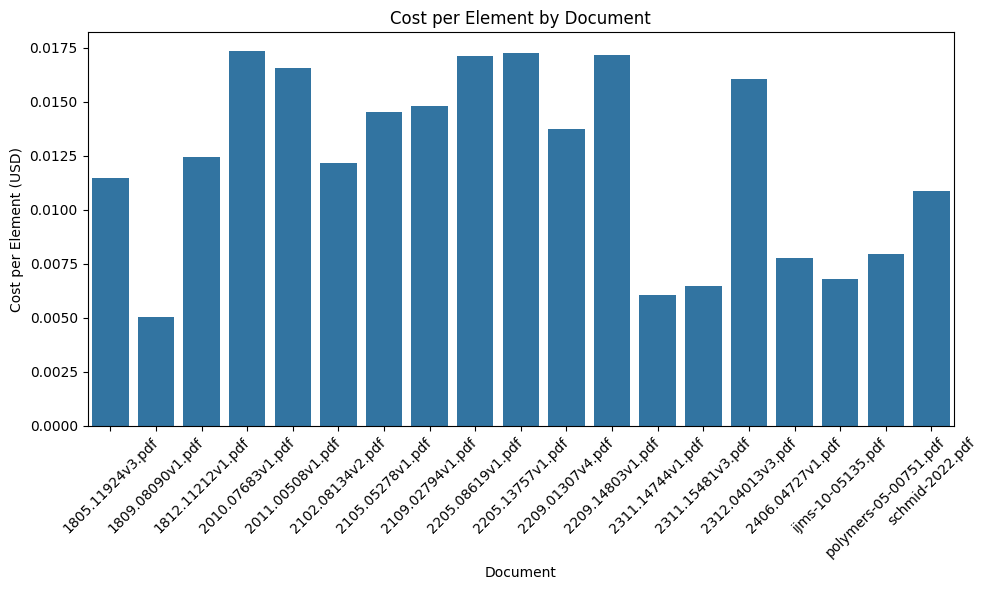

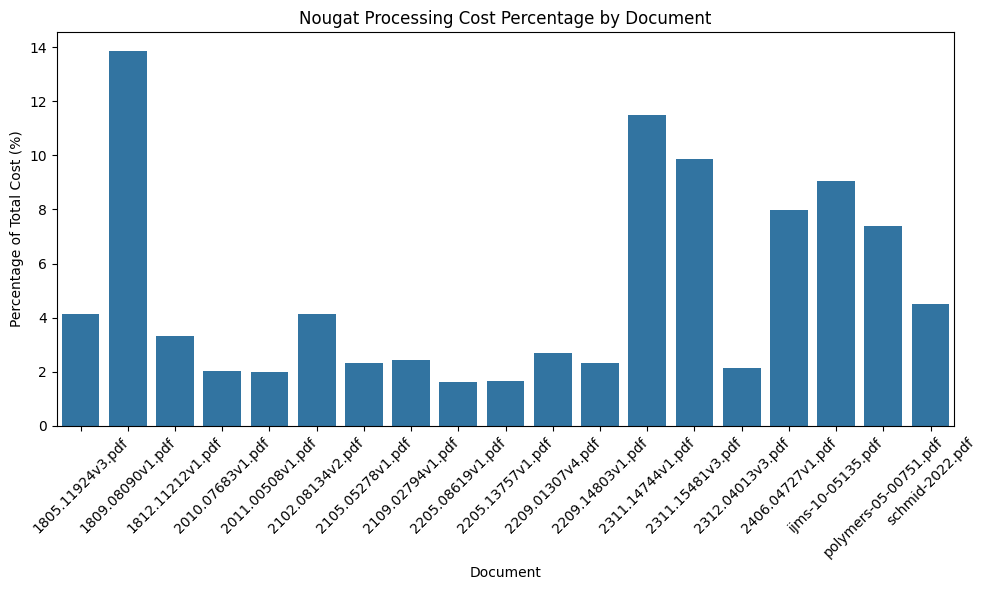


Cost Optimization Recommendations:
1. The average cost per page is $0.0147
2. Nougat image processing accounts for 139.7% of the total processing time
3. The most cost-effective document was: 2209.14803v1.pdf at $0.0089 per page
4. The least cost-effective document was: 1809.08090v1.pdf at $0.0248 per page

Projected Costs for Larger Datasets:
   Number of Documents  Projected Processing Time (hours)  \
0                   10                           0.172546   
1                   50                           0.862731   
2                  100                           1.725463   
3                  500                           8.627313   
4                 1000                          17.254626   

   Projected Cost (USD)  
0              4.543013  
1             22.715064  
2             45.430128  
3            227.150642  
4            454.301283  


In [5]:
def evaluate_pipeline_efficiency_overall(
        json_path, gpu_cost_per_hour=0.96, 
        postprocessing_cost_per_item=0.01,
        azure_doc_intell_cost_per_page=0.001,
        summarization_cost_per_document=0.05
        ):  # Added parameter for summarization cost
    """
    Evaluate pipeline efficiency and costs based on processing data
    
    Parameters:
    -----------
    json_path: str or Path
        Path to the combined_report.json file
    gpu_cost_per_hour: float
        Cost per hour for GPU usage in USD
    postprocessing_cost_per_item: float
        Cost per processed item (image or table) in USD
    azure_doc_intell_cost_per_page: float
        Azure Document Intelligence cost per page in USD
    summarization_cost_per_document: float
        Cost for summarization per document in USD
    """
    # Load processing data
    with open(json_path) as f:
        report_data = json.load(f)
    
    # Extract the documents array for document-level analysis
    documents_df = pd.DataFrame(report_data["documents"])
    
    # Use existing summary data from the JSON where available
    total_documents = report_data.get("total_documents", len(documents_df))
    total_pages = report_data.get("total_pages", documents_df['pages'].sum())
    total_images = report_data.get("total_images", documents_df['images'].sum())
    total_tables = report_data.get("total_tables", documents_df['tables'].sum())
    total_nougat_images = report_data.get("total_nougat_images", documents_df['nougat_images'].sum())
    total_time_seconds = report_data.get("total_time_seconds", documents_df['processing_time_seconds'].sum())
    
    # Print basic processing statistics
    print(f"Total documents processed: {total_documents}")
    print(f"Total pages processed: {total_pages}")
    print(f"Total images extracted: {total_images}")
    print(f"Total tables extracted: {total_tables}")
    print(f"Total nougat images processed: {total_nougat_images}")
    print(f"Total processing time: {total_time_seconds:.2f} seconds")
    
    # Calculate averages or use pre-computed values
    avg_pages_per_document = report_data.get("avg_pages_per_document", total_pages / total_documents)
    avg_images_per_document = report_data.get("avg_images_per_document", total_images / total_documents)
    avg_tables_per_document = report_data.get("avg_tables_per_document", total_tables / total_documents)
    avg_processing_time_per_document = report_data.get("avg_processing_time_per_document", 
                                                      total_time_seconds / total_documents)
    avg_processing_time_per_page = report_data.get("avg_processing_time_per_page", 
                                                  total_time_seconds / total_pages)
    
    print(f"\nAverage pages per document: {avg_pages_per_document:.2f}")
    print(f"Average images per document: {avg_images_per_document:.2f}")
    print(f"Average tables per document: {avg_tables_per_document:.2f}")
    print(f"Average processing time per document: {avg_processing_time_per_document:.2f} seconds")
    print(f"Average processing time per page: {avg_processing_time_per_page:.2f} seconds")
    
    # Cost Analysis
    # Calculate processing time in hours
    total_processing_time_hours = total_time_seconds / 3600
    
    # Calculate GPU cost
    total_gpu_cost = total_processing_time_hours * gpu_cost_per_hour
    
    # Calculate postprocessing cost for images and tables
    total_postprocessing_cost = (total_images + total_tables) * postprocessing_cost_per_item
    
    # Calculate Azure Document Intelligence cost
    total_azure_doc_cost = total_pages * azure_doc_intell_cost_per_page
    
    # Calculate summarization cost
    total_summarization_cost = total_documents * summarization_cost_per_document
    
    # Calculate total cost
    total_cost = total_gpu_cost + total_postprocessing_cost + total_azure_doc_cost + total_summarization_cost
    
    # Calculate average costs
    avg_cost_per_document = total_cost / total_documents
    avg_cost_per_page = total_cost / total_pages
    
    # Estimated nougat image processing time
    if 'processing_time_per_nougat_image' not in documents_df.columns:
        # Calculate if not present
        documents_df['processing_time_per_nougat_image'] = documents_df.apply(
            lambda row: row['processing_time_seconds'] / row['nougat_images'] if row['nougat_images'] > 0 else 0, 
            axis=1
        )
    
    avg_time_per_nougat_image = documents_df['processing_time_per_nougat_image'].mean()
    estimated_nougat_processing_time = total_nougat_images * avg_time_per_nougat_image
    nougat_processing_percentage = (estimated_nougat_processing_time / total_time_seconds) * 100 if total_time_seconds > 0 else 0
    estimated_nougat_gpu_cost = (estimated_nougat_processing_time / 3600) * gpu_cost_per_hour
    
    # Calculate costs per document
    documents_df['processing_time_hours'] = documents_df['processing_time_seconds'] / 3600
    documents_df['gpu_cost'] = documents_df['processing_time_hours'] * gpu_cost_per_hour
    documents_df['postprocessing_cost'] = (documents_df['images'] + documents_df['tables']) * postprocessing_cost_per_item
    documents_df['azure_doc_cost'] = documents_df['pages'] * azure_doc_intell_cost_per_page
    documents_df['summarization_cost'] = summarization_cost_per_document  # Add summarization cost per document
    documents_df['total_cost'] = documents_df['gpu_cost'] + documents_df['postprocessing_cost'] + documents_df['azure_doc_cost'] + documents_df['summarization_cost']
    documents_df['cost_per_page'] = documents_df['total_cost'] / documents_df['pages']
    
    # Estimated nougat processing cost per document
    documents_df['estimated_nougat_processing_time'] = documents_df['nougat_images'] * avg_time_per_nougat_image
    documents_df['estimated_nougat_processing_percentage'] = (documents_df['estimated_nougat_processing_time'] / documents_df['processing_time_seconds']) * 100
    documents_df['estimated_nougat_gpu_cost'] = (documents_df['estimated_nougat_processing_time'] / 3600) * gpu_cost_per_hour
    
    # Display cost metrics
    cost_metrics = {
        'Total GPU Cost (USD)': total_gpu_cost,
        'Total Postprocessing Cost (USD)': total_postprocessing_cost,
        'Total Azure Document Intelligence Cost (USD)': total_azure_doc_cost,
        'Total Summarization Cost (USD)': total_summarization_cost,  # Include summarization cost in the output
        'Total Cost (USD)': total_cost,
        'Average Cost per Document (USD)': avg_cost_per_document,
        'Average Cost per Page (USD)': avg_cost_per_page,
        'Estimated Nougat Processing Percentage (%)': nougat_processing_percentage,
        'Estimated Nougat GPU Cost (USD)': estimated_nougat_gpu_cost
    }
    
    print("\nCost Analysis:")
    for metric, value in cost_metrics.items():
        print(f"{metric}: ${value:.4f}")
    
    # Plot cost breakdown
    plt.figure(figsize=(10, 6))
    labels = ['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 'Postprocessing Cost', 'Azure Doc Intelligence', 'Summarization Cost']
    sizes = [
        total_gpu_cost - estimated_nougat_gpu_cost, 
        estimated_nougat_gpu_cost, 
        total_postprocessing_cost,
        total_azure_doc_cost,
        total_summarization_cost  # Add summarization cost to the pie chart
    ]
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)
    
    sizes = np.maximum(0, sizes)
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Cost Breakdown')
    plt.show()
    
    # Plot cost by document
    plt.figure(figsize=(12, 8))
    documents_df[['gpu_cost', 'estimated_nougat_gpu_cost', 'postprocessing_cost', 'azure_doc_cost', 'summarization_cost']].plot(
        kind='bar', stacked=True,
        color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],
        figsize=(12, 6)
    )
    plt.title('Cost Breakdown by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost (USD)')
    plt.xticks(range(len(documents_df)), documents_df['document_name'], rotation=45)
    plt.legend(['GPU Cost (excl. Nougat)', 'Nougat GPU Cost', 'Postprocessing Cost', 'Azure Doc Intelligence', 'Summarization Cost'])
    plt.tight_layout()
    plt.show()
    
    # Plot cost per page by document
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='cost_per_page', data=documents_df)
    plt.title('Cost per Page by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost per Page (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calculate cost efficiency metrics
    documents_df['cost_per_element'] = documents_df['total_cost'] / (documents_df['images'] + documents_df['tables'] + documents_df['nougat_images'])
    documents_df['nougat_cost_percentage'] = (documents_df['estimated_nougat_gpu_cost'] / documents_df['total_cost']) * 100
    
    # Display cost efficiency metrics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='cost_per_element', data=documents_df)
    plt.title('Cost per Element by Document')
    plt.xlabel('Document')
    plt.ylabel('Cost per Element (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='document_name', y='nougat_cost_percentage', data=documents_df)
    plt.title('Nougat Processing Cost Percentage by Document')
    plt.xlabel('Document')
    plt.ylabel('Percentage of Total Cost (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Find optimal batch size and processing strategies
    print("\nCost Optimization Recommendations:")
    print("1. The average cost per page is ${:.4f}".format(avg_cost_per_page))
    print("2. Nougat image processing accounts for {:.1f}% of the total processing time".format(nougat_processing_percentage))
    
    if len(documents_df) > 0:  # Safety check to prevent IndexError
        print("3. The most cost-effective document was: {} at ${:.4f} per page".format(
            documents_df.loc[documents_df['cost_per_page'].idxmin(), 'document_name'],
            documents_df['cost_per_page'].min()
        ))
        print("4. The least cost-effective document was: {} at ${:.4f} per page".format(
            documents_df.loc[documents_df['cost_per_page'].idxmax(), 'document_name'],
            documents_df['cost_per_page'].max()
        ))
    
    # Calculate the projected costs for processing larger datasets
    projected_costs = pd.DataFrame({
        'Number of Documents': [10, 50, 100, 500, 1000],
        'Projected Processing Time (hours)': [total_processing_time_hours * n / total_documents for n in [10, 50, 100, 500, 1000]],
        'Projected Cost (USD)': [total_cost * n / total_documents for n in [10, 50, 100, 500, 1000]]
    })
    
    print("\nProjected Costs for Larger Datasets:")
    print(projected_costs)
    
    # Return the data for further analysis if needed
    return {
        'documents_df': documents_df,
        'cost_metrics': cost_metrics,
        'projected_costs': projected_costs
    }

# Example usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set the path to your combined_report.json file
json_path = Path('combined_report.json')

# Set the cost parameters
gpu_cost_per_hour = 0.96  # USD/hour
postprocessing_cost_per_item = 0.02  # USD per image or table
azure_doc_intell_cost_per_page = 0.001  # USD per page
summarization_cost_per_document = 0.05  # USD per document

# Run the evaluation
results = evaluate_pipeline_efficiency_overall(
    json_path,
    gpu_cost_per_hour,
    postprocessing_cost_per_item,
    azure_doc_intell_cost_per_page,
    summarization_cost_per_document
)

In [6]:
# Set the cost parameters
gpu_cost_per_hour = 0.96  # USD/hour
postprocessing_cost_per_item = 0.01  # USD per image or table
azure_doc_intell_cost_per_page = 0.001  # USD per page
summarization_cost_per_document = 0.025  # USD per document

# Run the evaluation
results = evaluate_pipeline_efficiency(
    json_path,
    gpu_cost_per_hour,
    postprocessing_cost_per_item,
    azure_doc_intell_cost_per_page,
    summarization_cost_per_document
)

Total documents processed: 19
Total pages processed: 587
Total images extracted: 241
Total tables extracted: 98
Total nougat images processed: 512
Total processing time: 1180.22 seconds

Average pages per document: 30.89
Average images per document: 12.68
Average tables per document: 5.16
Average processing time per document: 62.12 seconds
Average processing time per page: 2.01 seconds

Cost Analysis:
Total GPU Cost (USD): $0.3147
Total Image Classification Cost (USD): $2.4100
Total Table Classification Cost (USD): $0.0980
Total Image Captioning Cost (USD): $6.0250
Total Table Captioning Cost (USD): $0.4900
Total Azure Document Intelligence Cost (USD): $0.5870
Total Summarization Cost (USD): $0.9500
Total Cost (USD): $10.8747
Average Cost per Document (USD): $0.5724
Average Cost per Page (USD): $0.0185
Estimated Nougat Processing Percentage (%): $139.7223
Estimated Nougat GPU Cost (USD): $0.4397

Cost Optimization Recommendations:
1. The average cost per page is $0.0185
2. Nougat image